## Resultados dos experimentos referentes ao DIF-MS

In [1]:
import pandas as pd
import numpy as np
import math
from math import pi
import sys
import os
from IPython.display import display
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks

from analysis import general_cd, general_results

import warnings
warnings.filterwarnings('ignore')

In [2]:
datasets = ['amphet', 'adult', 'bank', 'arrhythmia', 'compasmen', 'compaswomen', 'contraceptive',
            'ecstasy', 'german', 'heart', 'student', 'titanic'] 
algorithms = ['ada', 'ad', 'dt', 'knn', 'mlp', 'rf', 'svm', 'xgb'] 
columns = ['DIF-MS(ML1)', 'DIF-MS(ML2)', 'DIF-MS(ML3)', 'MCJ', 'OCJ']

## Resultados no conjunto de teste

In [3]:
# Média geral das métricas analisadas
df = general_results(datasets, algorithms)
df.groupby(by = ['Selection']).mean()

,f1_macro,ratio_f1_macro,ratio_selection_rate,ratio_recall,ratio_odds
Selection,,,,,
DIF-MS(ML1),0.712224,0.928216,0.682814,0.826209,0.705383
DIF-MS(ML2),0.715628,0.938023,0.698488,0.840333,0.722970
DIF-MS(ML3),0.711525,0.936556,0.697894,0.840139,0.721696
MCJ,0.706875,0.928301,0.712027,0.840261,0.734240
OCJ,0.708874,0.924045,0.710191,0.837397,0.729511


(DIF-MS(ML1)) Média dos ranks: 2.640625
(DIF-MS(ML2)) Média dos ranks: 2.6197916666666665
(DIF-MS(ML3)) Média dos ranks: 2.953125
(MCJ) Média dos ranks: 3.4739583333333335
(OCJ) Média dos ranks: 3.3125
CD =  0.6225263964900405


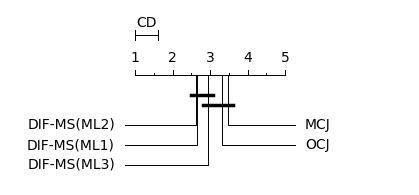

In [4]:
# Diagrama CD - Macro F1-Score
general_cd(datasets, algorithms, 'f1_macro', columns, 'cd_macro_f1_cap6')

(DIF-MS(ML1)) Média dos ranks: 3.078125
(DIF-MS(ML2)) Média dos ranks: 2.84375
(DIF-MS(ML3)) Média dos ranks: 2.7395833333333335
(MCJ) Média dos ranks: 3.078125
(OCJ) Média dos ranks: 3.2604166666666665
CD =  0.6225263964900405


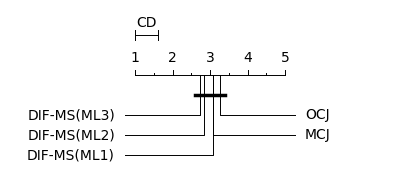

In [5]:
# Diagrama CD - RMF1
general_cd(datasets, algorithms, 'ratio_f1_macro', columns, 'cd_rmf1_macro_cap6')

(DIF-MS(ML1)) Média dos ranks: 3.3385416666666665
(DIF-MS(ML2)) Média dos ranks: 3.078125
(DIF-MS(ML3)) Média dos ranks: 3.0520833333333335
(MCJ) Média dos ranks: 2.6510416666666665
(OCJ) Média dos ranks: 2.8802083333333335
CD =  0.6225263964900405


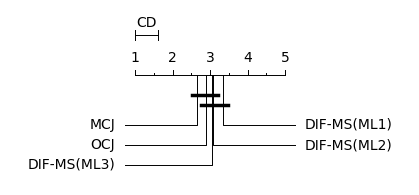

In [6]:
# Diagrama CD - RDP
general_cd(datasets, algorithms, 'ratio_selection_rate', columns, 'cd_rpd_cap6')

(DIF-MS(ML1)) Média dos ranks: 3.1979166666666665
(DIF-MS(ML2)) Média dos ranks: 2.796875
(DIF-MS(ML3)) Média dos ranks: 2.9427083333333335
(MCJ) Média dos ranks: 3.046875
(OCJ) Média dos ranks: 3.015625
CD =  0.6225263964900405


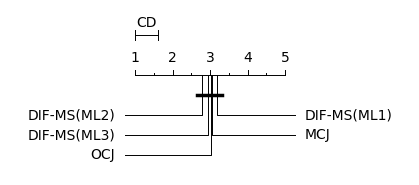

In [7]:
# Diagrama CD - RIO
general_cd(datasets, algorithms, 'ratio_recall', columns, 'cd_rio_cap6')

(DIF-MS(ML1)) Média dos ranks: 3.4010416666666665
(DIF-MS(ML2)) Média dos ranks: 2.90625
(DIF-MS(ML3)) Média dos ranks: 2.9583333333333335
(MCJ) Média dos ranks: 2.765625
(OCJ) Média dos ranks: 2.96875
CD =  0.6225263964900405


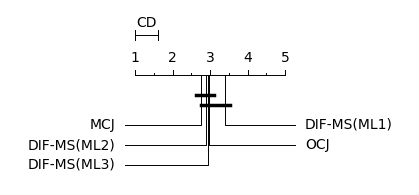

In [8]:
# Diagrama CD - RPE
general_cd(datasets, algorithms, 'ratio_odds', columns, 'cd_rpe_cap6')

### Gera os gráficos do tipo radar para comparar DIF-MS(ML2) e MCJ

In [9]:
def create_df(config, selection, metric):
    
    df_radar = pd.DataFrame({
        'selection' : selection,
        'AD'  : [config.loc[selection[0], 'ad'][metric], config.loc[selection[1], 'ad'][metric]],
        'ADA' : [config.loc[selection[0], 'ada'][metric], config.loc[selection[1], 'ada'][metric]],
        'DT'  : [config.loc[selection[0], 'dt'][metric], config.loc[selection[1], 'dt'][metric]],
        'k-NN': [config.loc[selection[0], 'knn'][metric], config.loc[selection[1], 'knn'][metric]],
        'MLP' : [config.loc[selection[0], 'mlp'][metric], config.loc[selection[1], 'mlp'][metric]],
        'RF'  : [config.loc[selection[0], 'rf'][metric], config.loc[selection[1], 'rf'][metric]],
        'SVM' : [config.loc[selection[0], 'svm'][metric], config.loc[selection[1], 'svm'][metric]],
        'XGB' : [config.loc[selection[0], 'xgb'][metric], config.loc[selection[1], 'xgb'][metric]]
    })
    
    
    return df_radar

In [10]:
def radar_chart(df_radar, y_lim, y_min, y_max, y_ticks, y_names, legend, name):
    # ------- PART 1: Create background

    # number of variable
    categories=list(df_radar)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels 
    ax.set_rlabel_position(0.6)
    if y_lim == True:
        plt.yticks(y_ticks, y_names, color="dimgray", size=10, alpha=0.75)
        plt.ylim(y_min, y_max)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't make a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1

    values=df_radar.loc[0].drop('selection').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, marker='o', markersize=4, color='steelblue', 
            linestyle='solid', label=df_radar['selection'][0])
    ax.fill(angles, values, 'steelblue', alpha=0.15)

    # Ind2
    values=df_radar.loc[1].drop('selection').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, marker='o', markersize=4, color='chocolate', 
            linestyle='solid', label=df_radar['selection'][1])
    ax.fill(angles, values, 'chocolate', alpha=0.15)

    # Add legend
    if legend == True:
        plt.legend(loc='lower right', fontsize=12)
    #plt.legend(loc='best')

    plt.savefig(name + '.pdf', format='pdf', bbox_inches='tight')

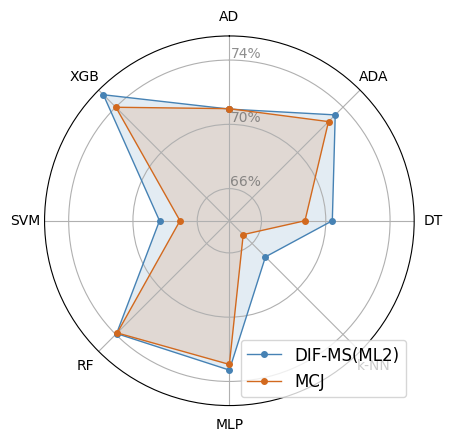

In [11]:
# Gráfico Radar - Macro F1-Score
config = df.groupby(by=['Selection', 'Config']).mean()
df_radar = create_df(config, ['DIF-MS(ML2)', 'MCJ'], 'f1_macro')
radar_chart(df_radar, True, 0.64, 0.755, [0.66, 0.70, 0.74], ['66%', '70%', '74%'], 
            True, 'radar-f1')

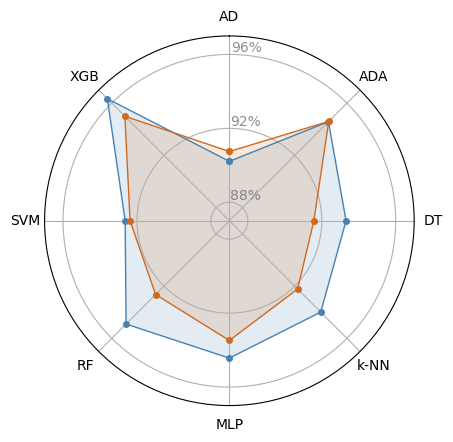

In [12]:
# Gráfico Radar - RMF1
df_radar = create_df(config, ['DIF-MS(ML2)', 'MCJ'], 'ratio_f1_macro')
radar_chart(df_radar, True, 0.87, 0.97, [0.88, 0.92, 0.96], ['88%', '92%', '96%'], 
            False, 'radar-rmf1')

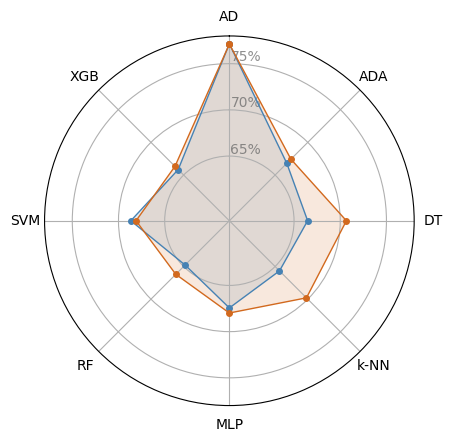

In [13]:
# Gráfico Radar - RPD
df_radar = create_df(config, ['DIF-MS(ML2)', 'MCJ'], 'ratio_selection_rate')
radar_chart(df_radar, True, 0.60, 0.80, [0.67, 0.72, 0.77], ['65%', '70%', '75%'], 
            False, 'radar-rpd')

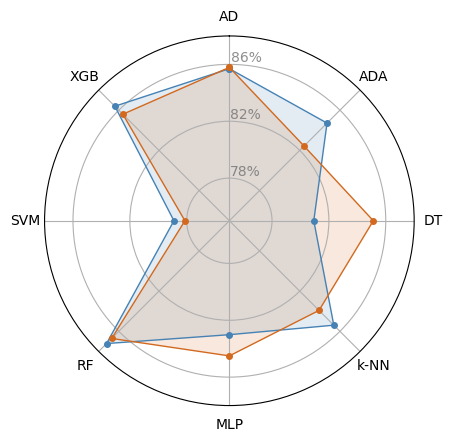

In [14]:
# Gráfico Radar - RIO
df_radar = create_df(config, ['DIF-MS(ML2)', 'MCJ'], 'ratio_recall')
radar_chart(df_radar, True, 0.75, 0.88, [0.78, 0.82, 0.86], ['78%', '82%', '86%'], 
            False, 'radar-rio')

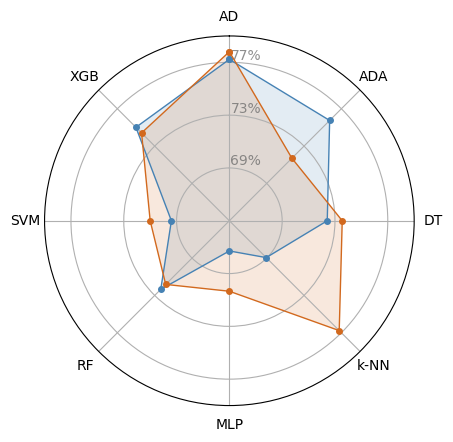

In [15]:
# Gráfico Radar - RPE
df_radar = create_df(config, ['DIF-MS(ML2)', 'MCJ'], 'ratio_odds')
radar_chart(df_radar, True, 0.65, 0.79, [0.69, 0.73, 0.77], ['69%', '73%', '77%'], 
            False, 'radar-rpe')